In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


In [7]:
preprocessed_dataset = pd.read_csv("../data/pre-processed/preprocessed_youtube_data.csv")
raw_dataset = pd.read_csv("../data/raw/youtube_vidoe_metrics.csv")

In [8]:
# Assuming preprocessed_dataset is your DataFrame
df = preprocessed_dataset.copy()

category_map = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

df['category_name'] = df['category_id'].map(category_map)

df['actual_subs'] = raw_dataset['c_subscriber_count_initial'].values

# Plot settings
sns.set_theme(style="whitegrid")

# Engagement by category name
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='engagement_score', data=df)
plt.title("Engagement Score by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `engagement_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

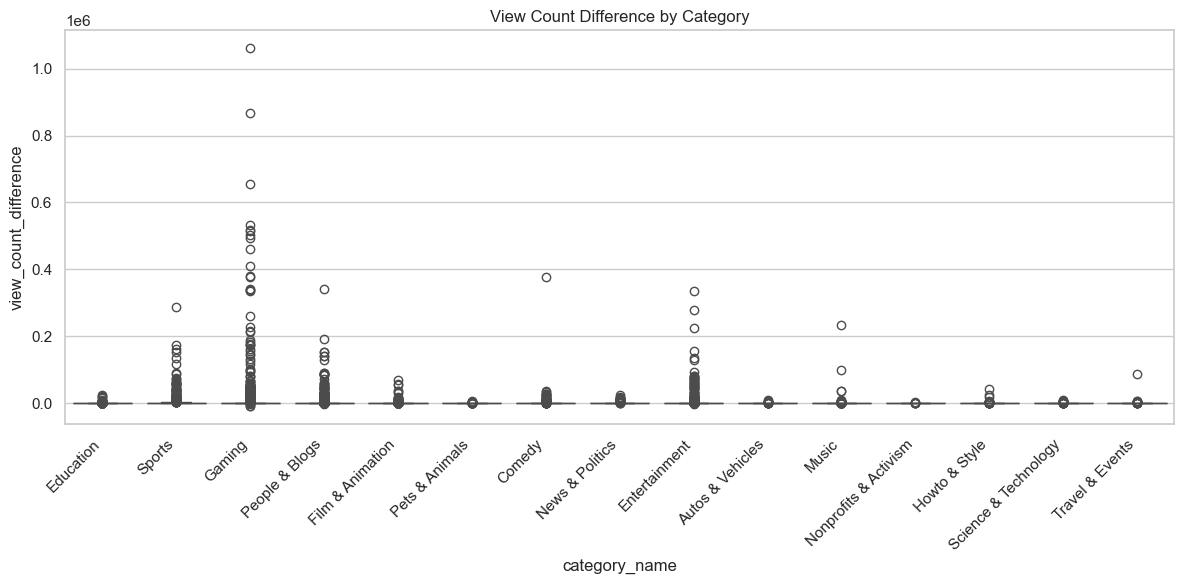

In [5]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='view_count_difference', data=df)
plt.title("View Count Difference by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

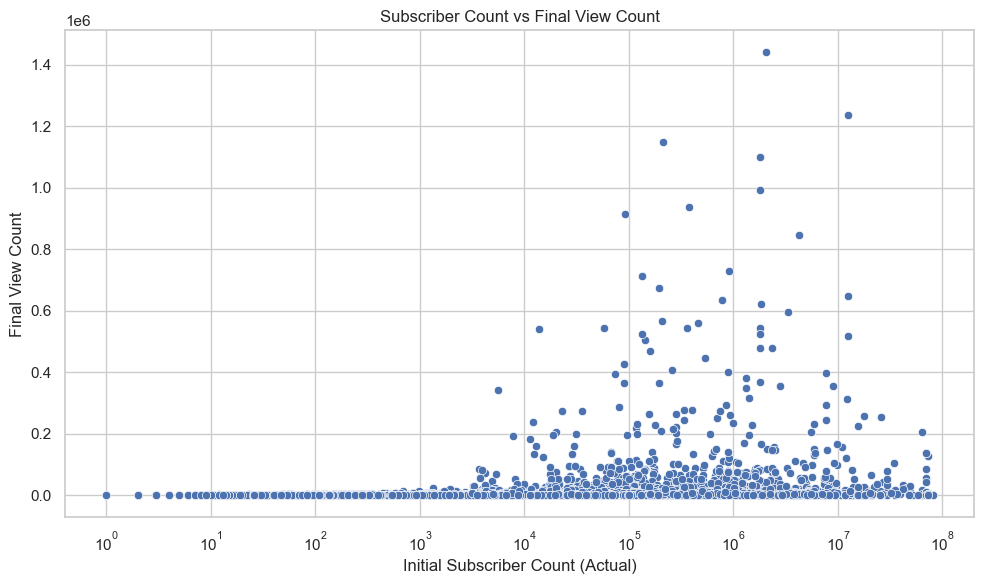

In [6]:
# 3. Actual Subscriber Count vs Final View Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_subs', y='view_count_final', data=df)
plt.title("Subscriber Count vs Final View Count")
plt.xlabel("Initial Subscriber Count (Actual)")
plt.ylabel("Final View Count")
plt.xscale("log")  # optional if distribution is wide
plt.tight_layout()
plt.show()

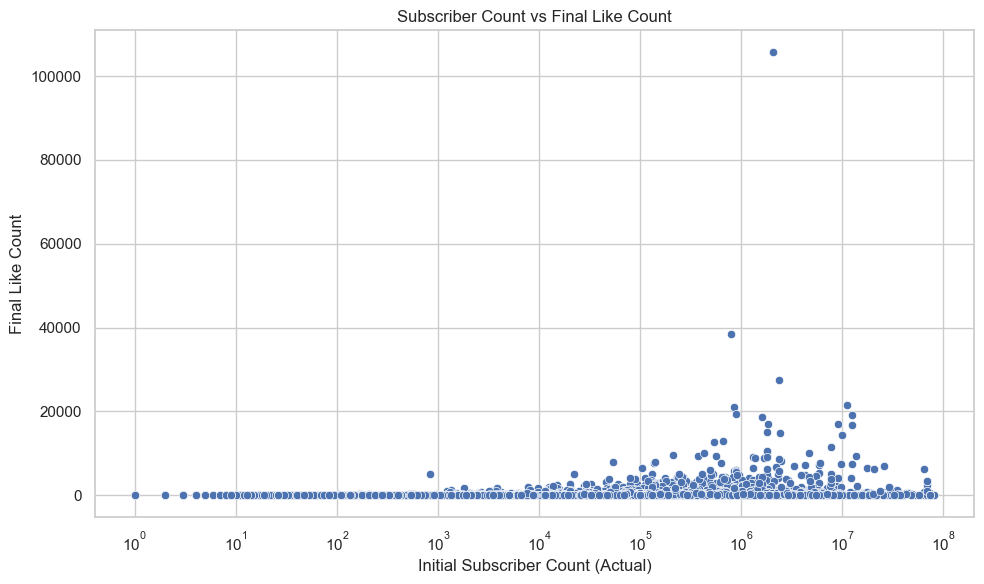

In [7]:
# 4. Actual Subscriber Count vs Final Like Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_subs', y='like_count_final', data=df)
plt.title("Subscriber Count vs Final Like Count")
plt.xlabel("Initial Subscriber Count (Actual)")
plt.ylabel("Final Like Count")
plt.xscale("log")  # optional
plt.tight_layout()
plt.show()

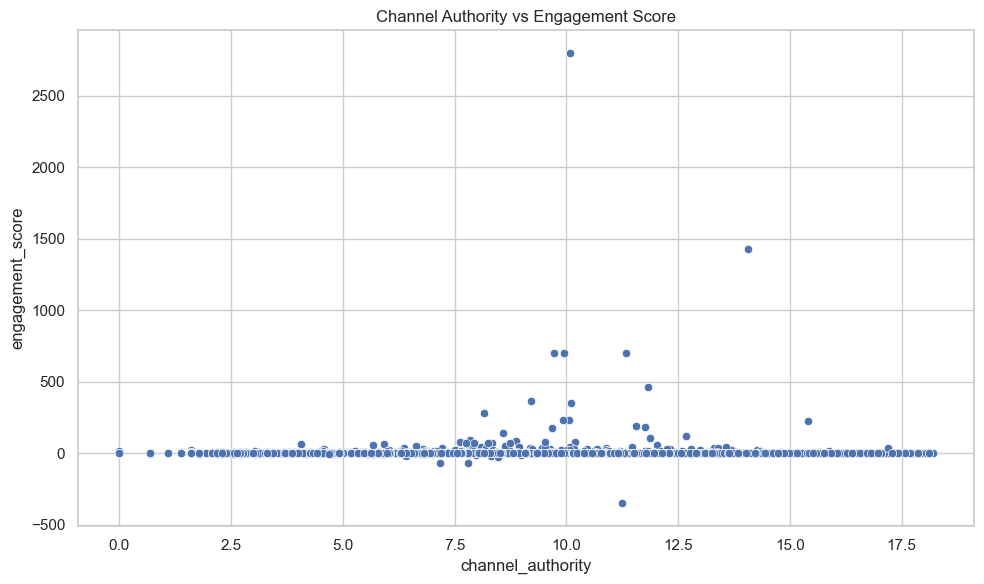

In [8]:
# 5. Channel Authority vs Engagement Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='channel_authority', y='engagement_score', data=df)
plt.title("Channel Authority vs Engagement Score")
plt.tight_layout()
plt.show()


In [9]:
preprocessed_dataset.columns

Index(['category_id', 'definition', 'view_count_initial', 'like_count_initial',
       'c_view_count_initial', 'c_subscriber_count_initial',
       'view_count_final', 'like_count_final', 'published_year',
       'published_month', 'published_day_of_week', 'published_time',
       'view_count_difference', 'like_count_difference',
       'avg_view_diff_per_category', 'avg_likes_diff_per_category',
       'engagement_score', 'channel_authority', 'logged_at_initial_hour',
       'logged_at_final_hour'],
      dtype='object')

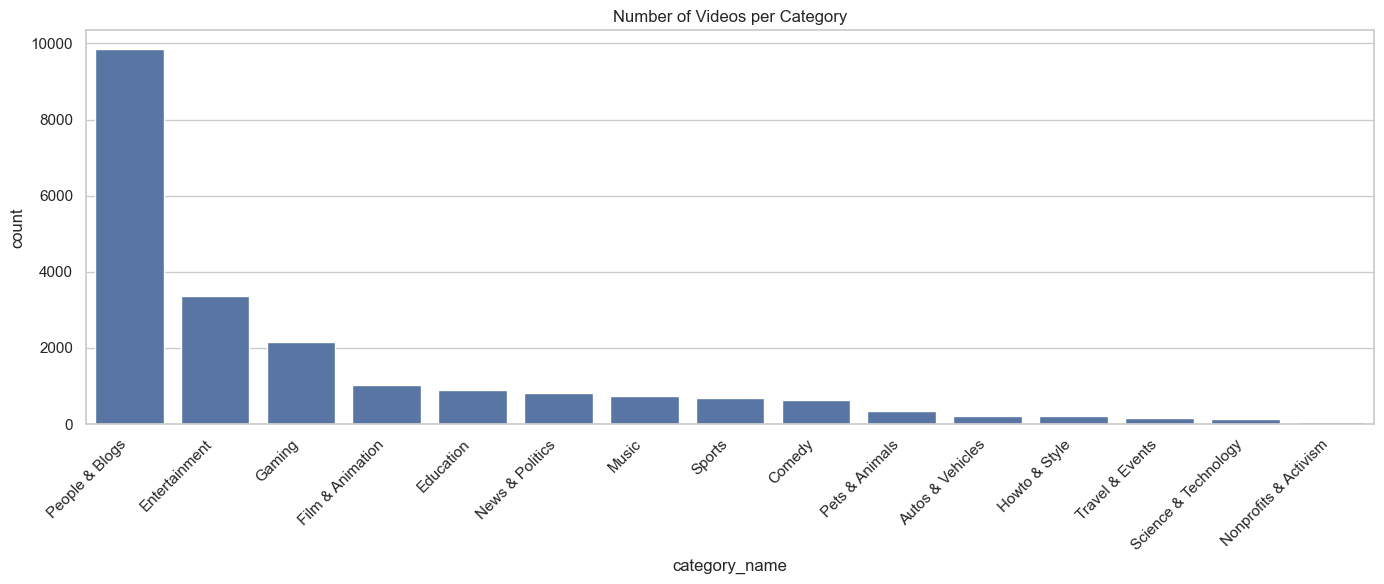

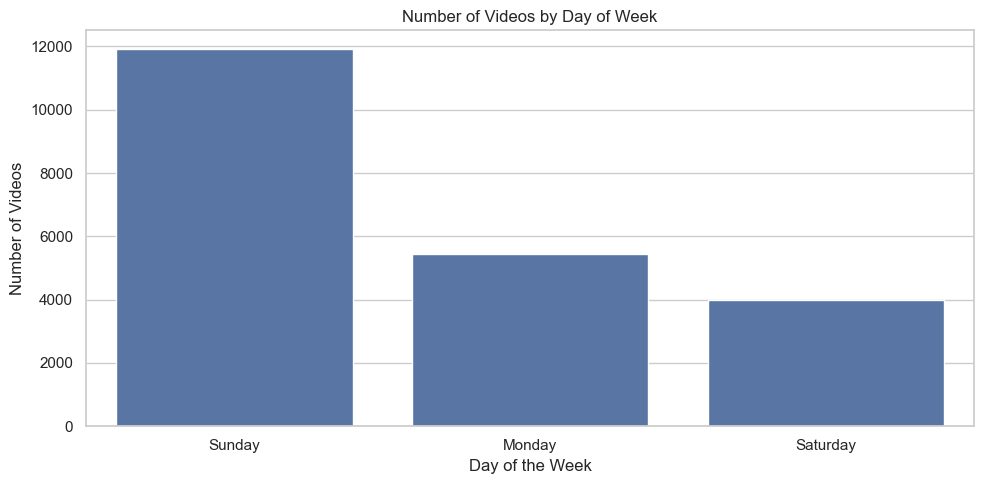

In [10]:
# Count of videos per category
plt.figure(figsize=(14, 6))
sns.countplot(x='category_name', data=df, order=df['category_name'].value_counts().index)
plt.title("Number of Videos per Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count of videos per day of week
plt.figure(figsize=(10, 5))
sns.countplot(x='published_day_of_week', data=df)
plt.title("Number of Videos by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()


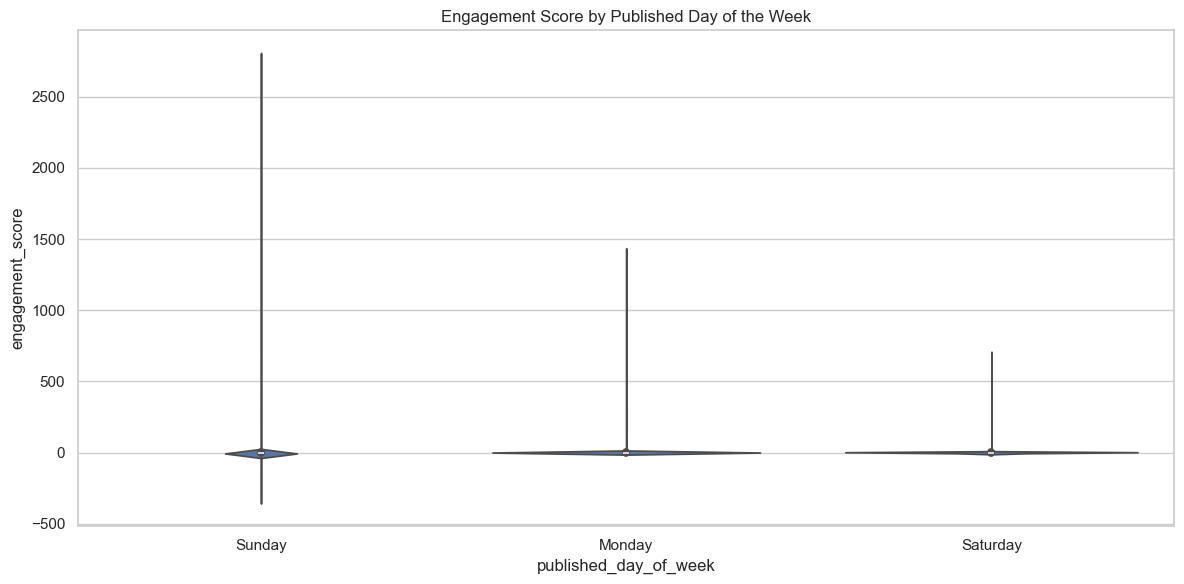

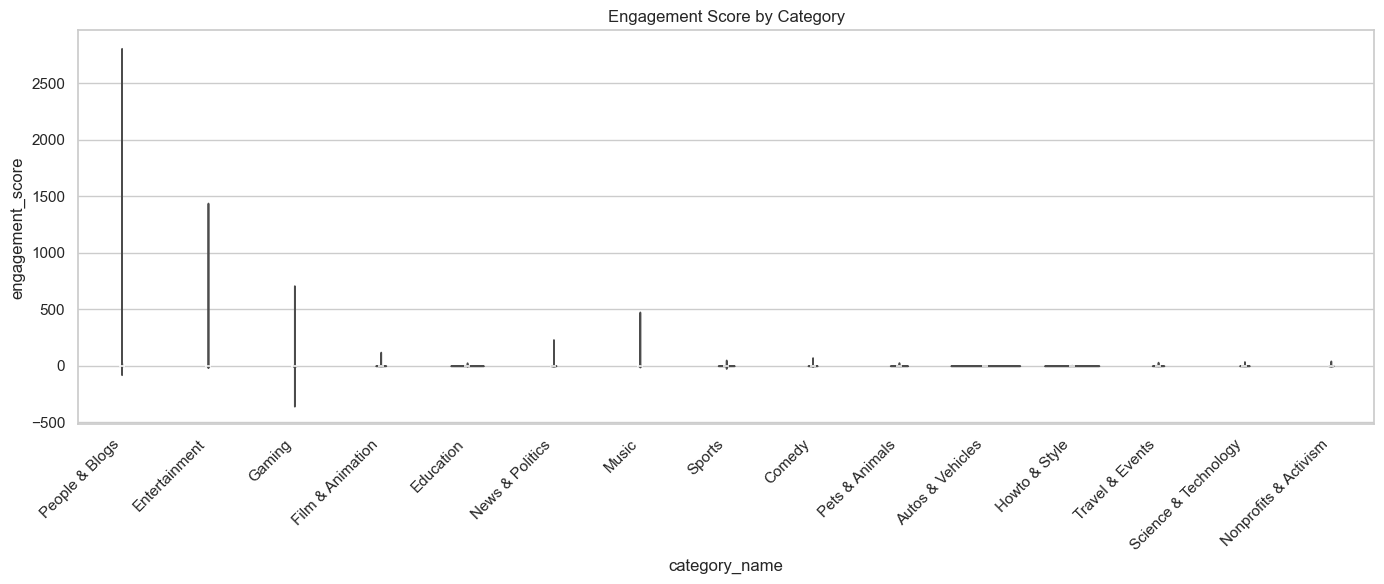

In [11]:
# Engagement score by published day
plt.figure(figsize=(12, 6))
sns.violinplot(x='published_day_of_week', y='engagement_score', data=df)
plt.title("Engagement Score by Published Day of the Week")
plt.tight_layout()
plt.show()

# Engagement score by category
plt.figure(figsize=(14, 6))
sns.violinplot(x='category_name', y='engagement_score', data=df, order=df['category_name'].value_counts().index)
plt.title("Engagement Score by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


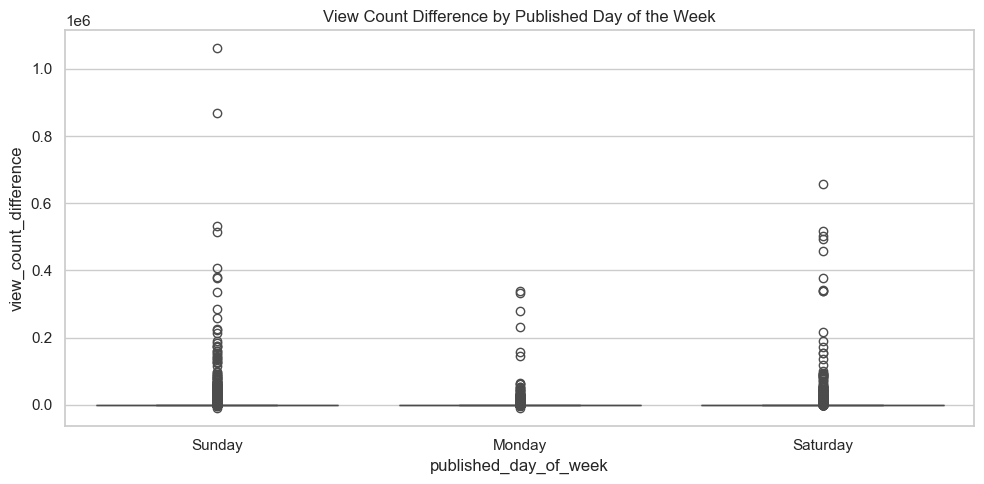

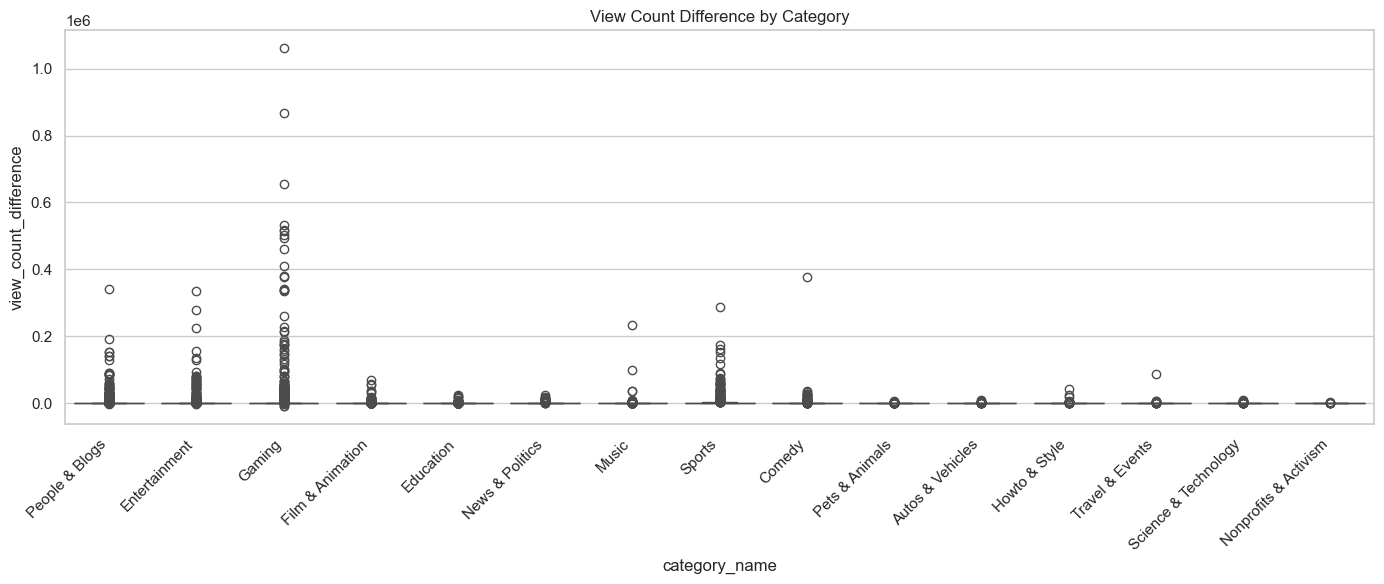

In [12]:
# View count difference by day
plt.figure(figsize=(10, 5))
sns.boxplot(x='published_day_of_week', y='view_count_difference', data=df)
plt.title("View Count Difference by Published Day of the Week")
plt.tight_layout()
plt.show()

# View count difference by category
plt.figure(figsize=(14, 6))
sns.boxplot(x='category_name', y='view_count_difference', data=df, order=df['category_name'].value_counts().index)
plt.title("View Count Difference by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


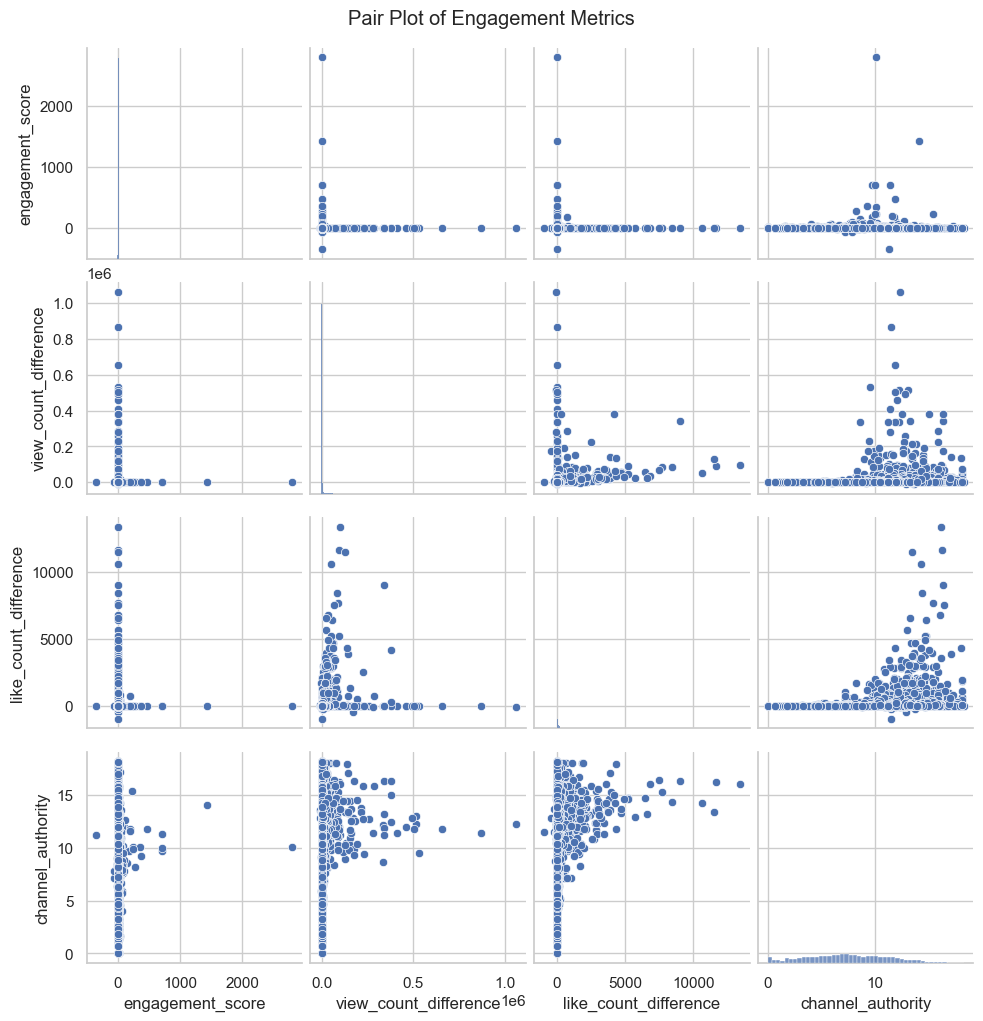

In [13]:
# Select features for pairplot
selected_features = [
    'engagement_score', 
    'view_count_difference', 
    'like_count_difference', 
    'channel_authority'
]

sns.pairplot(df[selected_features])
plt.suptitle("Pair Plot of Engagement Metrics", y=1.02)
plt.show()


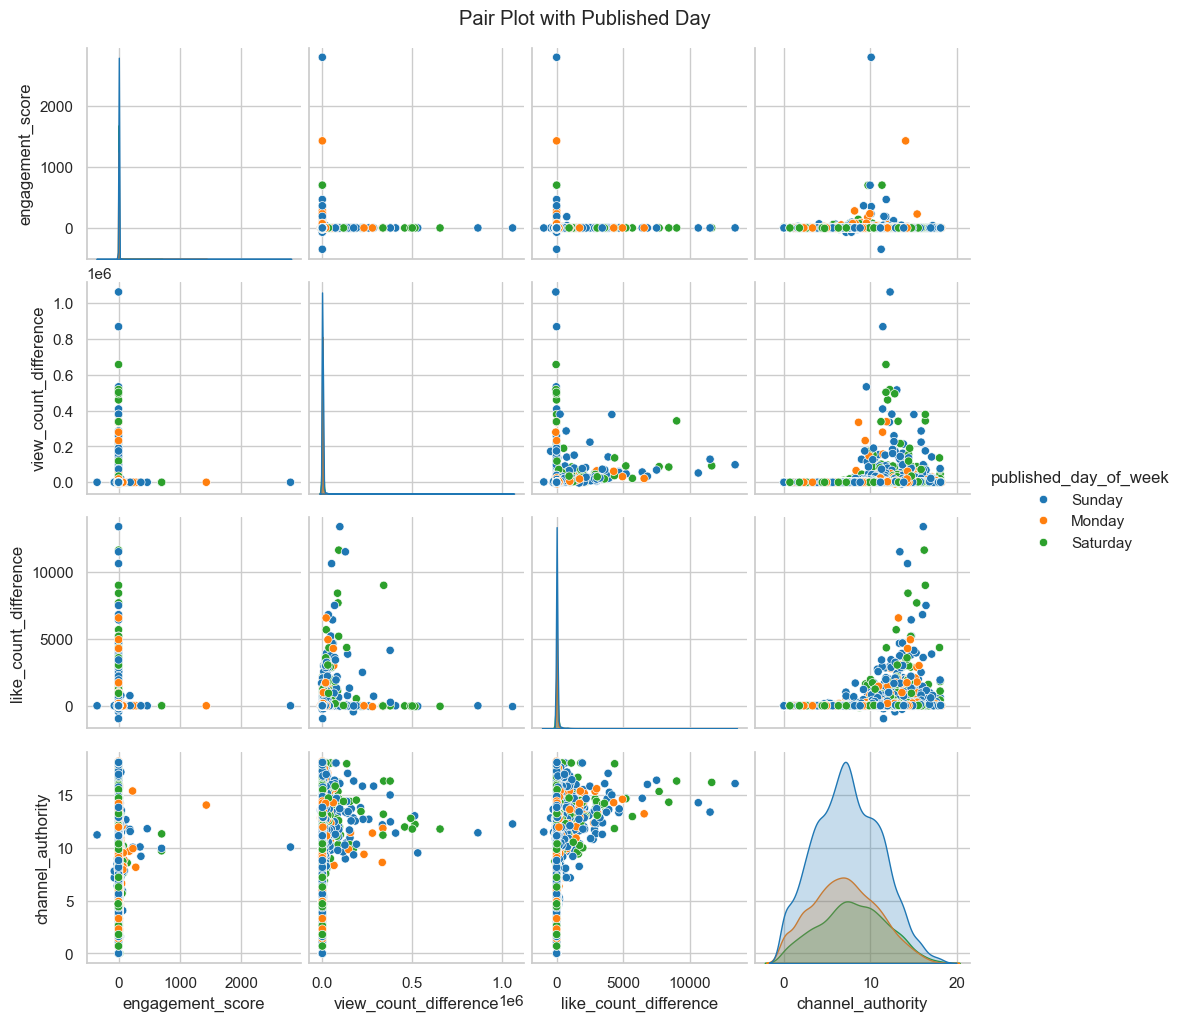

In [14]:
# Optional hue to distinguish categories or days
sns.pairplot(df[selected_features + ['published_day_of_week']], hue='published_day_of_week', palette="tab10")
plt.suptitle("Pair Plot with Published Day", y=1.02)
plt.show()


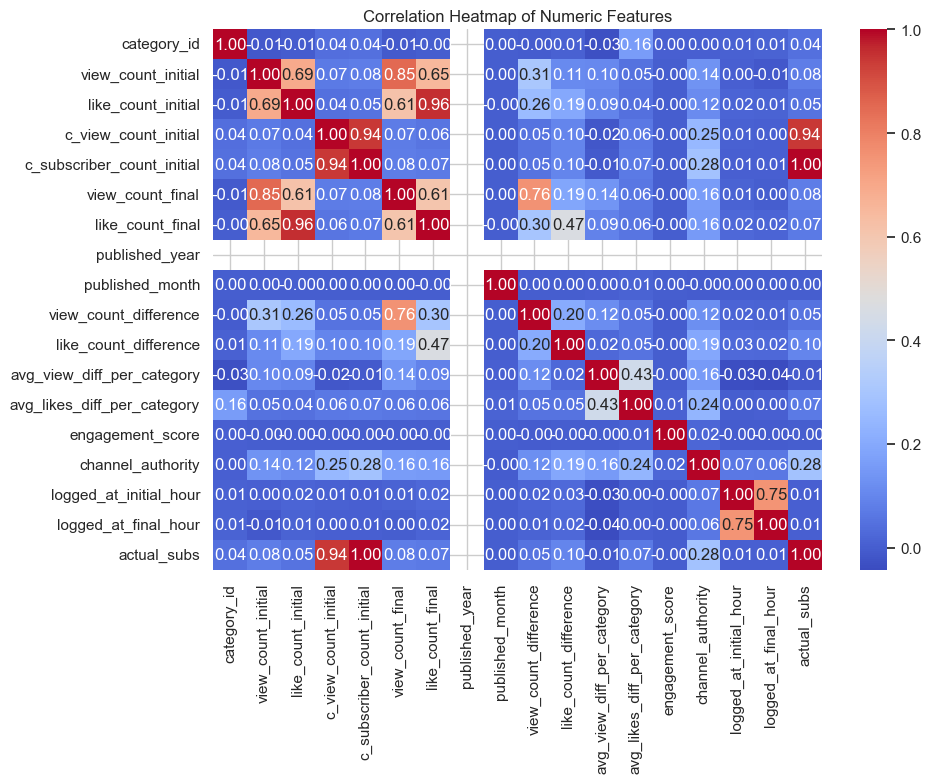

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


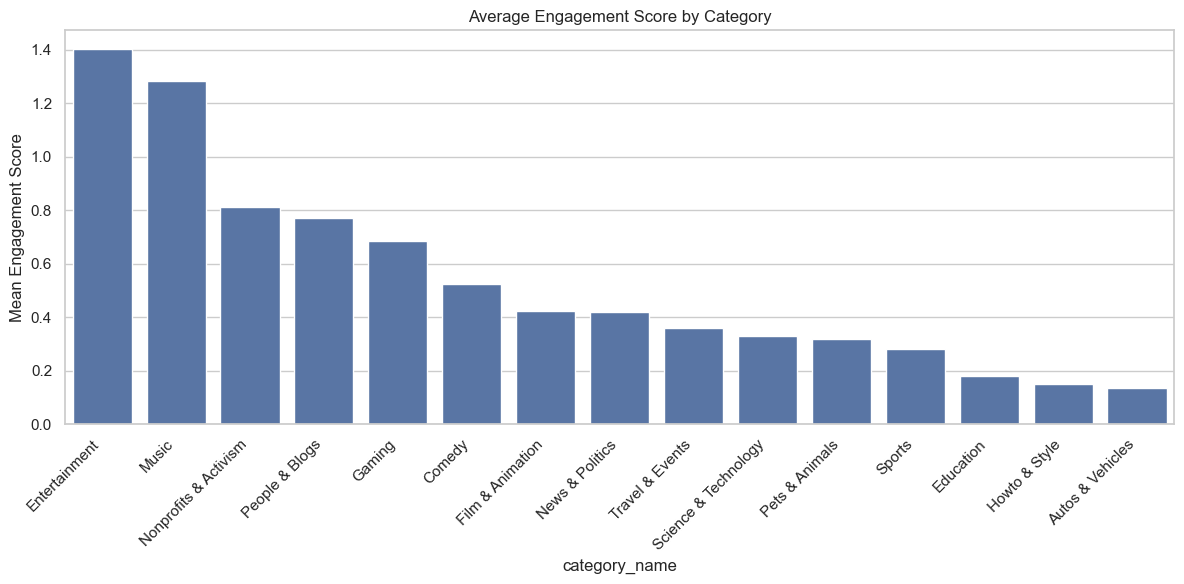


Top 5 Performing Categories by Engagement Score:


,mean,count
category_name,,
Entertainment,1.403102,3252
Music,1.283903,722
Nonprofits & Activism,0.811960,55
People & Blogs,0.769999,9496
Gaming,0.683659,2084


In [16]:
category_stats = df.groupby('category_name')['engagement_score'].agg(['mean', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_stats.index, y=category_stats['mean'])
plt.xticks(rotation=45, ha='right')
plt.title("Average Engagement Score by Category")
plt.ylabel("Mean Engagement Score")
plt.tight_layout()
plt.show()

# Print table
print("\nTop 5 Performing Categories by Engagement Score:")
display(category_stats.head(5))


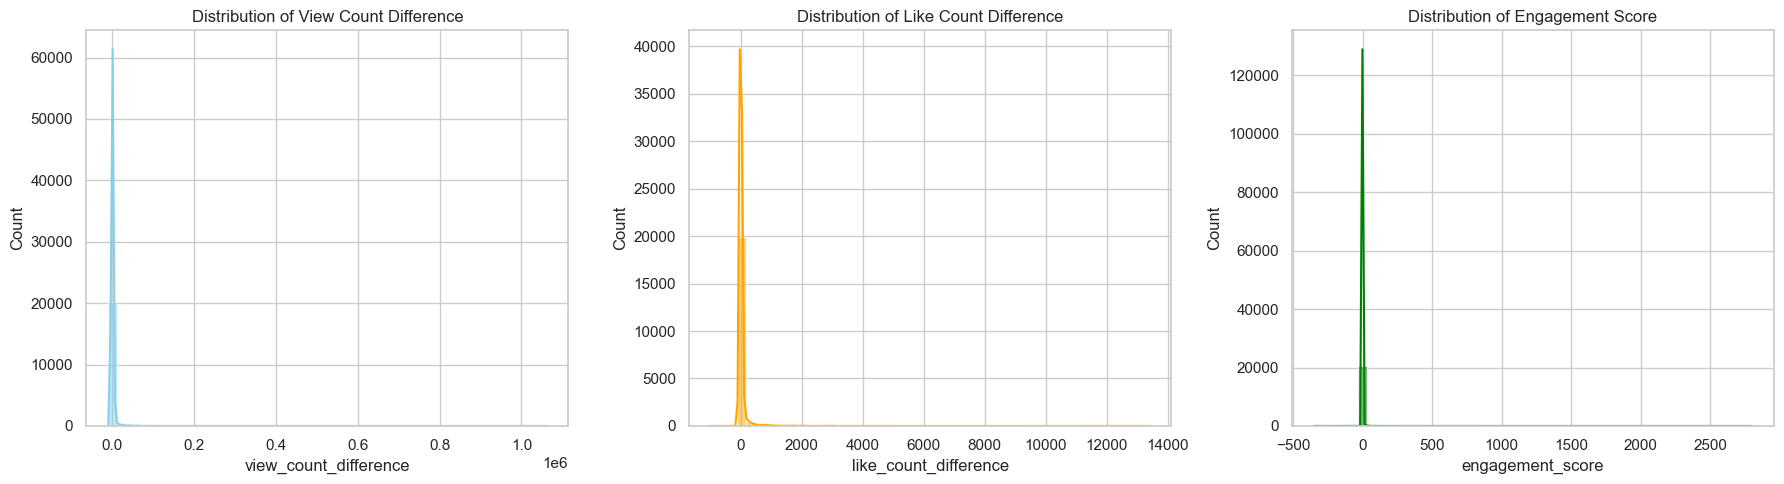

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['view_count_difference'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of View Count Difference")

sns.histplot(df['like_count_difference'], bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Distribution of Like Count Difference")

sns.histplot(df['engagement_score'], bins=50, kde=True, ax=axes[2], color='green')
axes[2].set_title("Distribution of Engagement Score")

plt.tight_layout()
plt.show()

/Users/donaldaadithiyan/Personal learn dev/YT-analytics/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/donaldaadithiyan/Personal learn dev/YT-analytics/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/donaldaadithiyan/Personal learn dev/YT-analytics/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/donaldaadithiyan/Personal learn dev/YT-analytics/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/donaldaadithiyan/Personal learn dev/YT-analytics/.venv/lib/python3.13/site-packages/pandas/

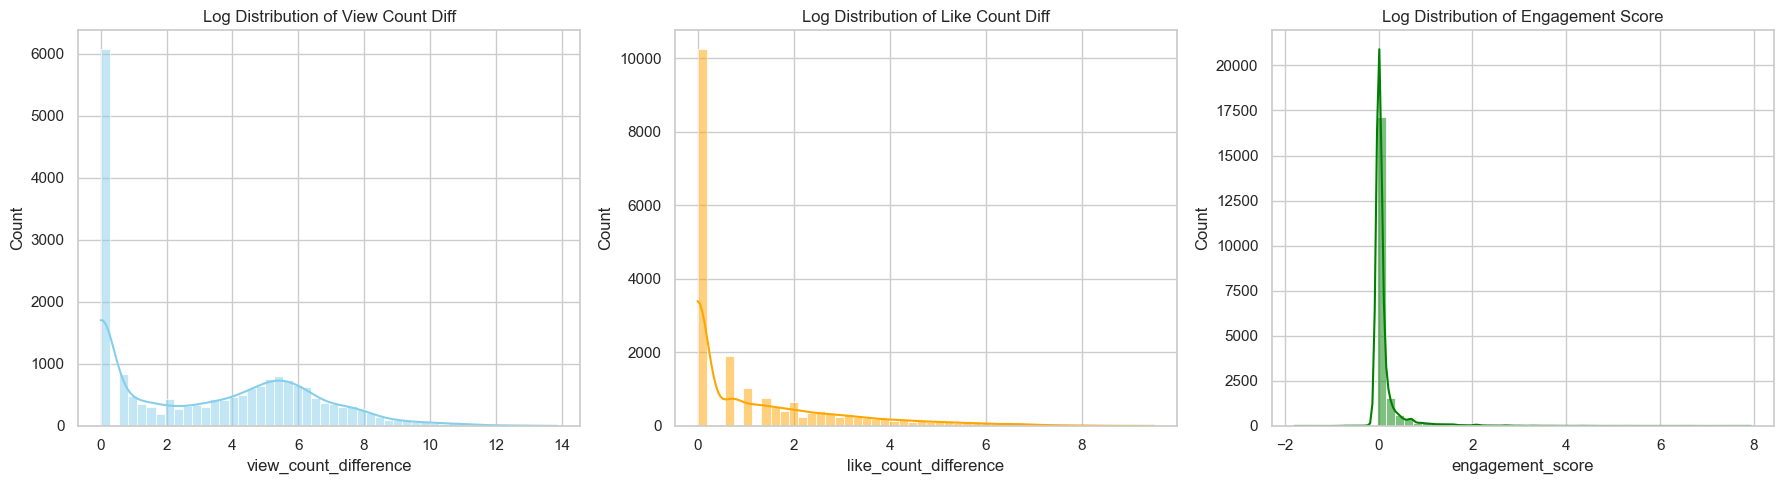

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(np.log1p(df['view_count_difference']), bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Log Distribution of View Count Diff")

sns.histplot(np.log1p(df['like_count_difference']), bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Log Distribution of Like Count Diff")

sns.histplot(np.log1p(df['engagement_score']), bins=50, kde=True, ax=axes[2], color='green')
axes[2].set_title("Log Distribution of Engagement Score")

plt.tight_layout()
plt.show()



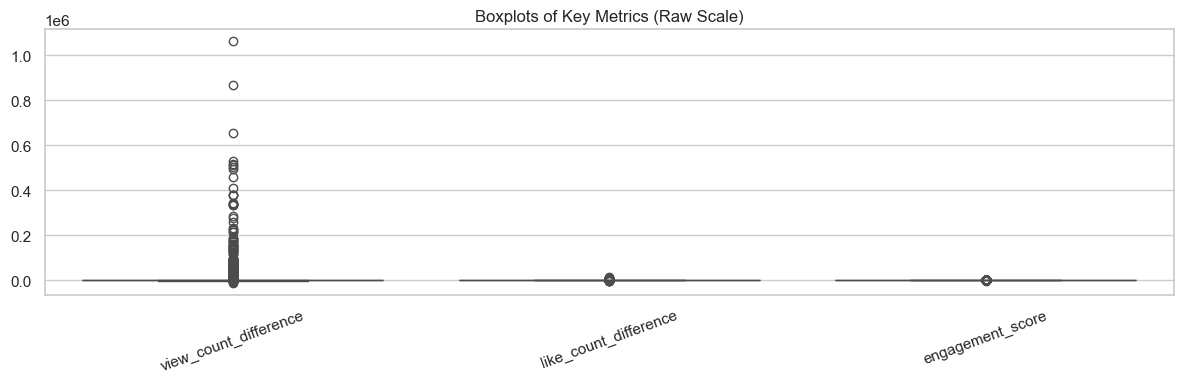

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['view_count_difference', 'like_count_difference', 'engagement_score']])
plt.title("Boxplots of Key Metrics (Raw Scale)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


We can see the data is highly skewed 


/var/folders/vx/lz_s92194473v0lcw_034qq40000gn/T/ipykernel_81903/560462761.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_class', data=df, palette='Set2')


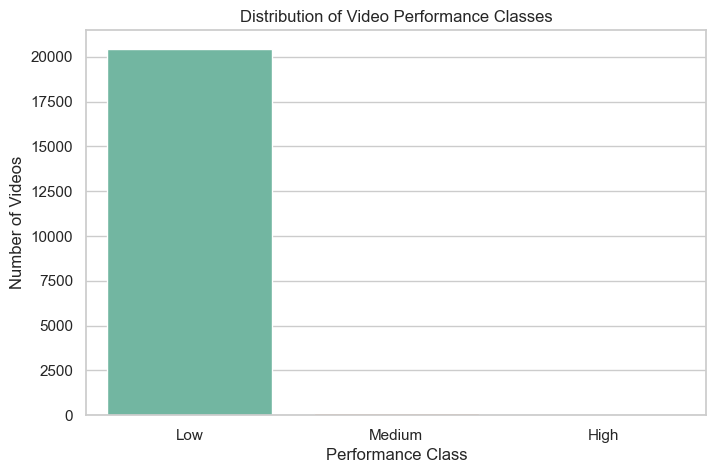

In [22]:
# Define bins for engagement_score
bins = [-float('inf'), 10, 100, float('inf')]
labels = ['Low', 'Medium', 'High']

df['performance_class'] = pd.cut(df['engagement_score'], bins=bins, labels=labels)
plt.figure(figsize=(8, 5))
sns.countplot(x='performance_class', data=df, palette='Set2')
plt.title("Distribution of Video Performance Classes")
plt.xlabel("Performance Class")
plt.ylabel("Number of Videos")
plt.show()

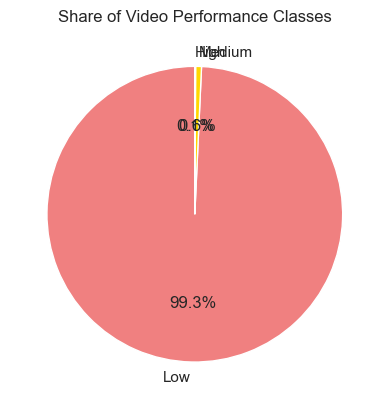

In [23]:
df['performance_class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'gold', 'lightgreen'])
plt.ylabel("")
plt.title("Share of Video Performance Classes")
plt.show()


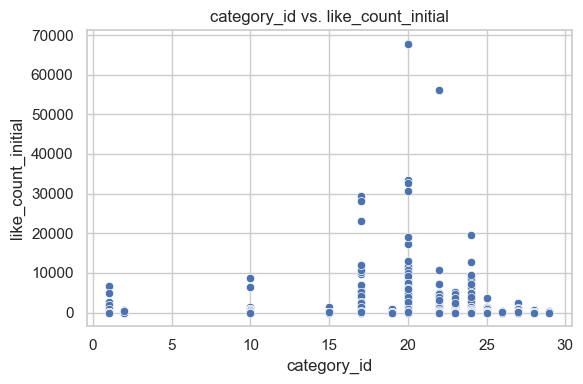

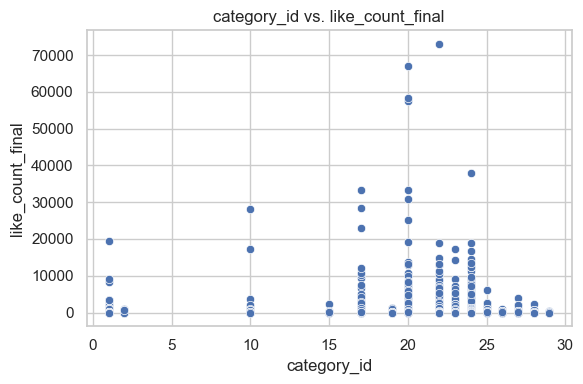

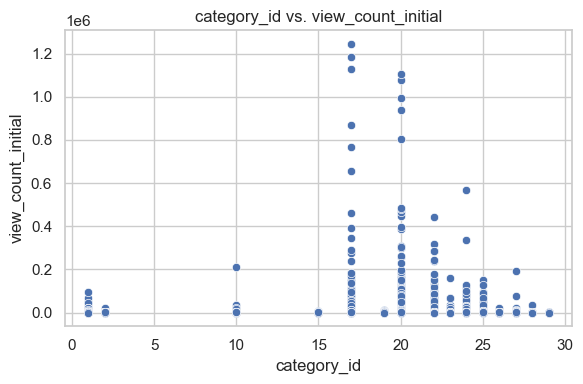

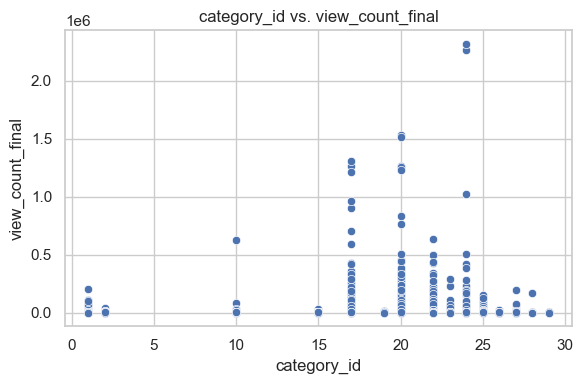

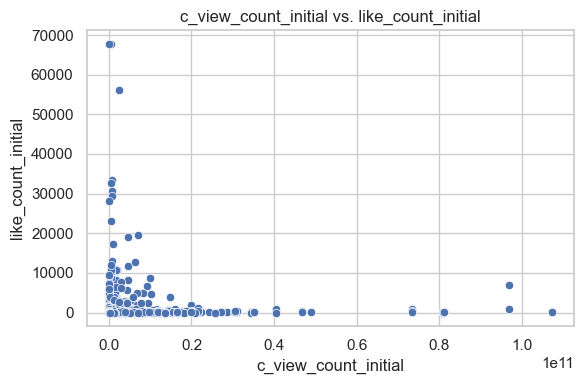

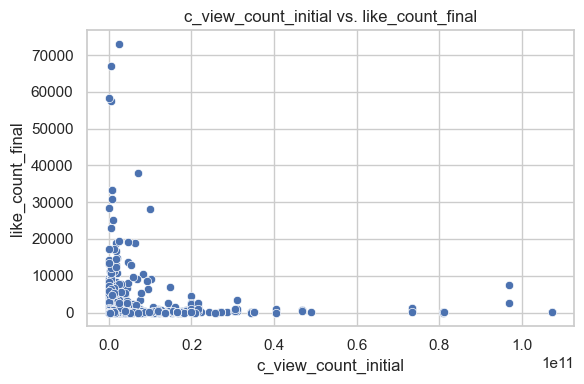

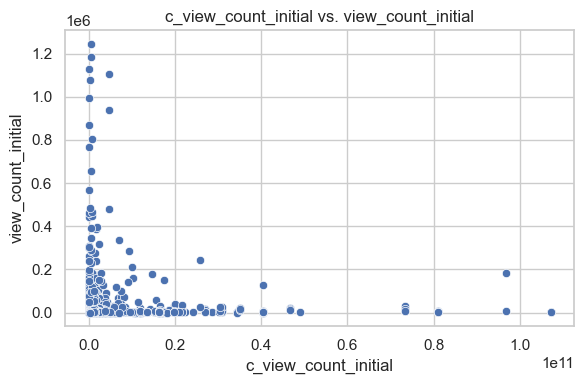

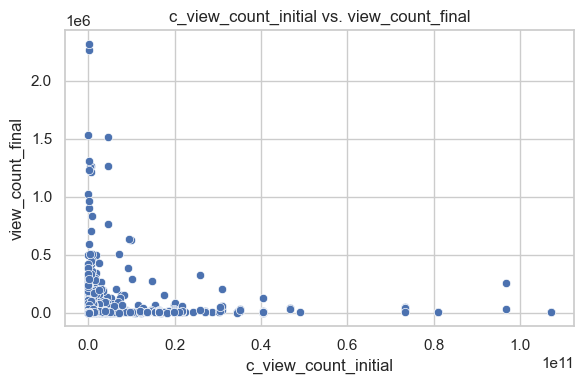

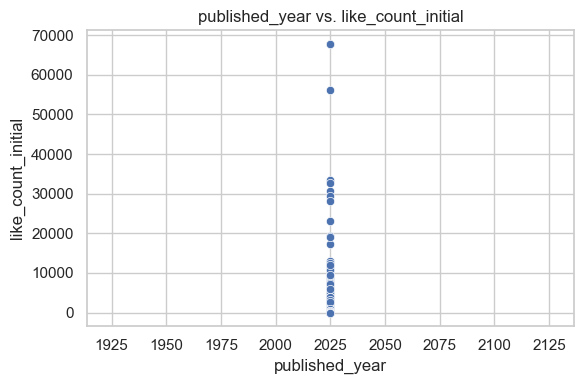

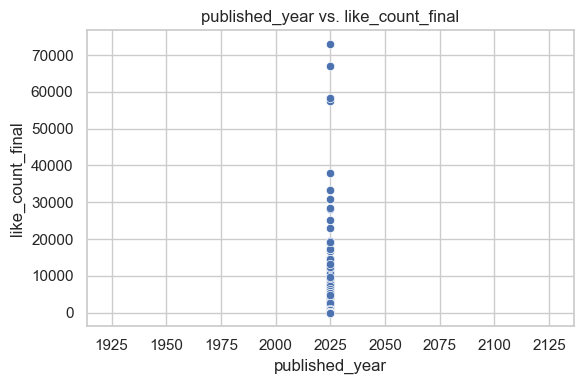

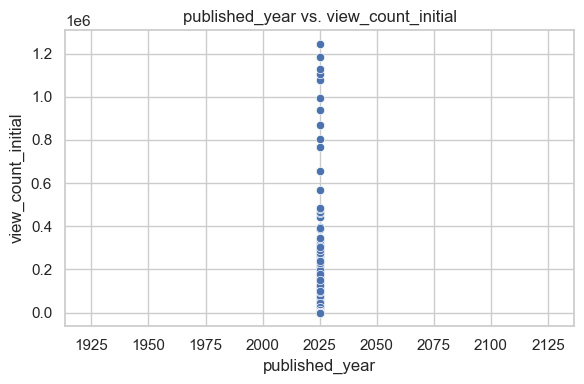

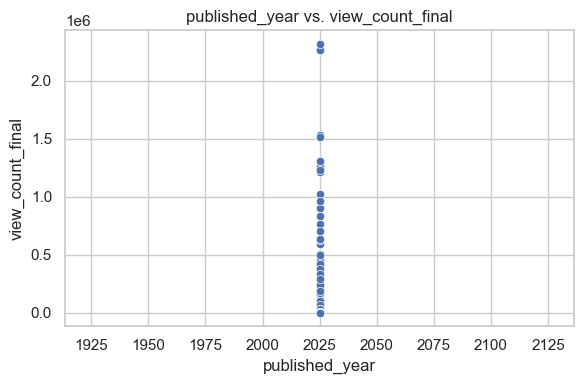

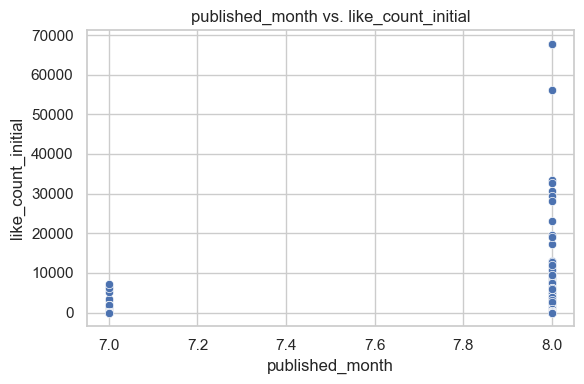

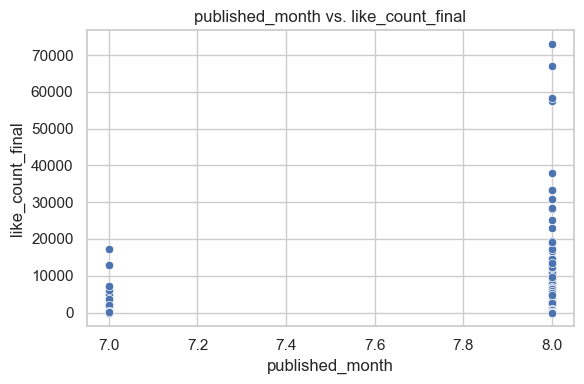

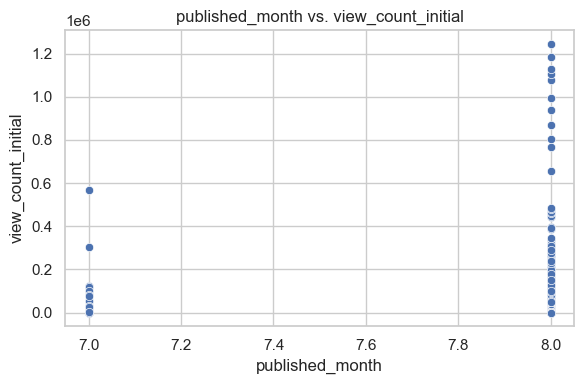

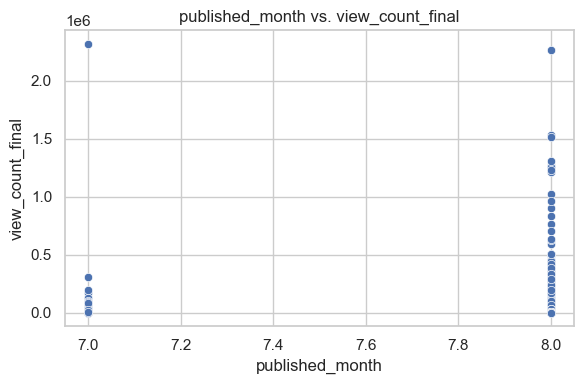

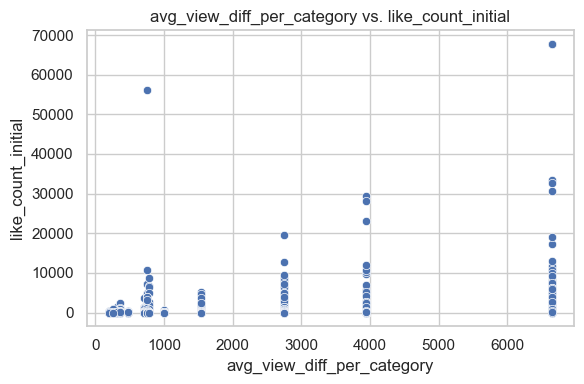

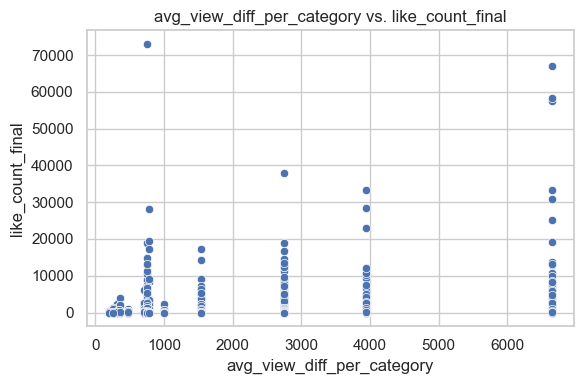

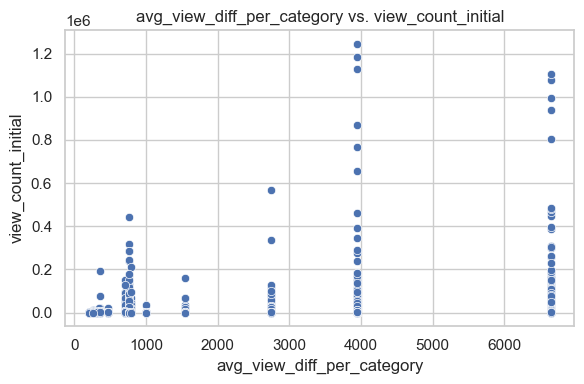

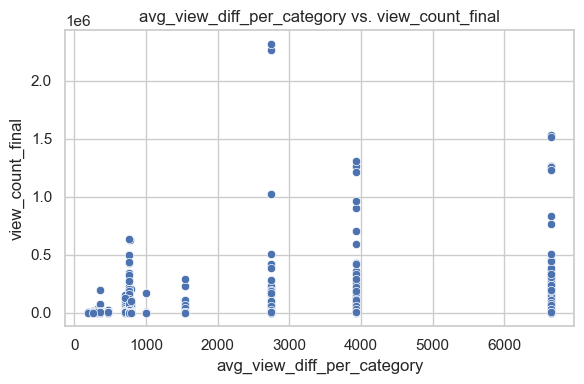

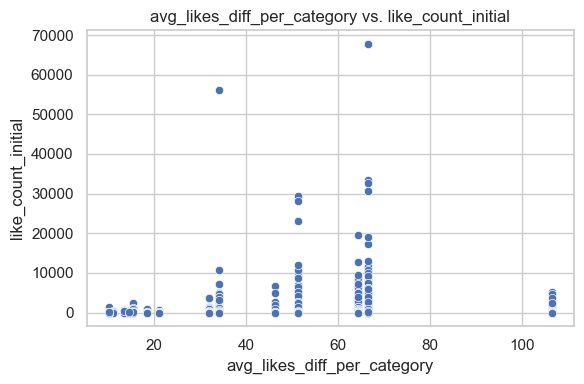

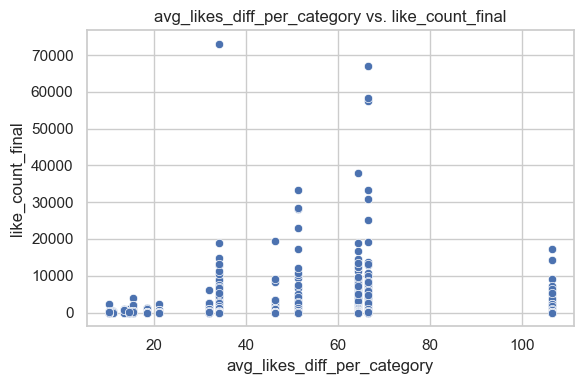

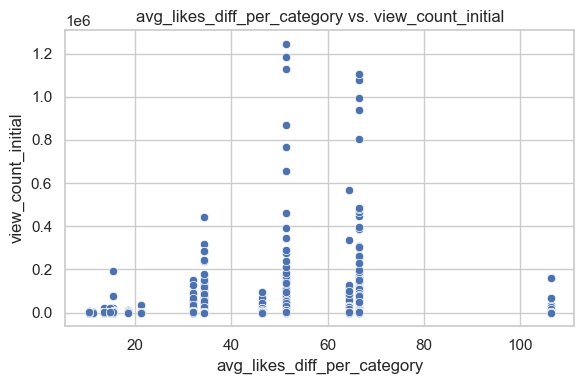

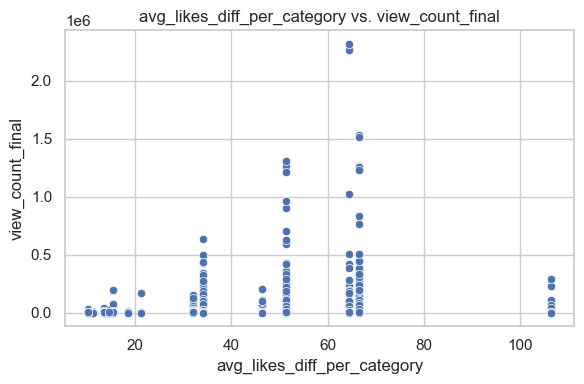

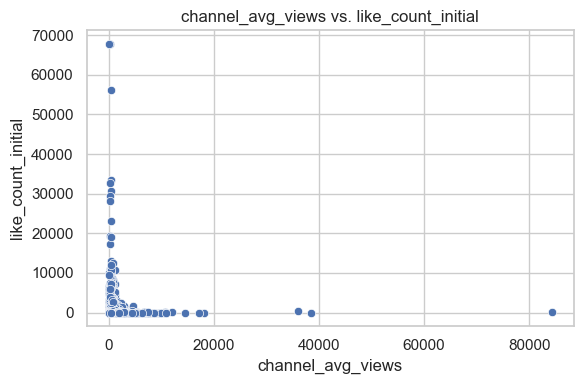

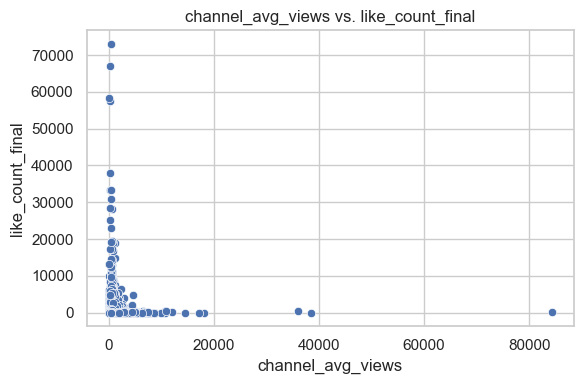

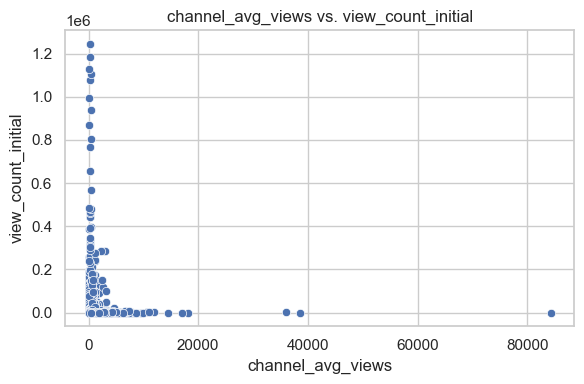

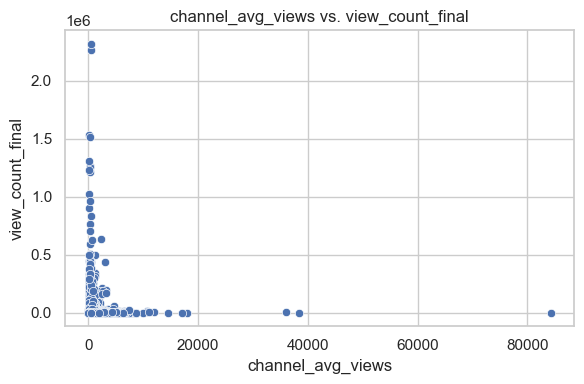

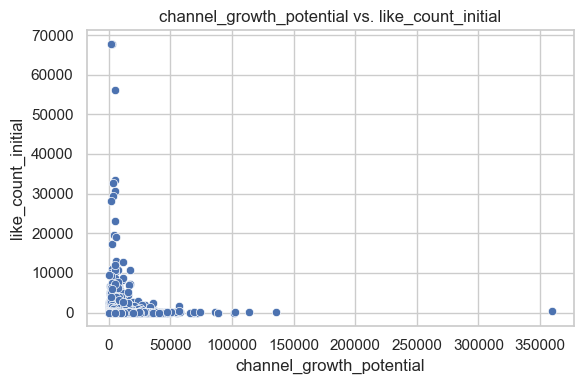

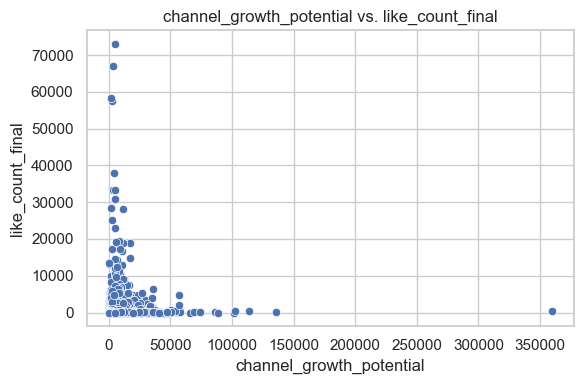

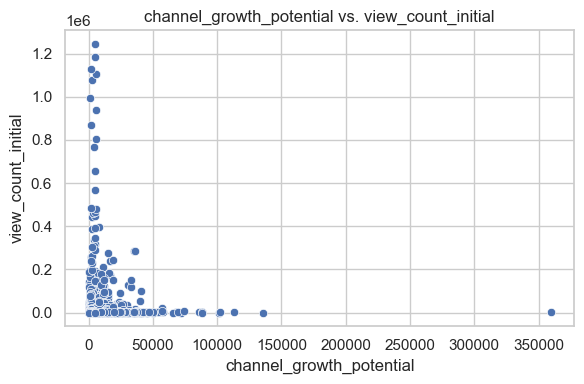

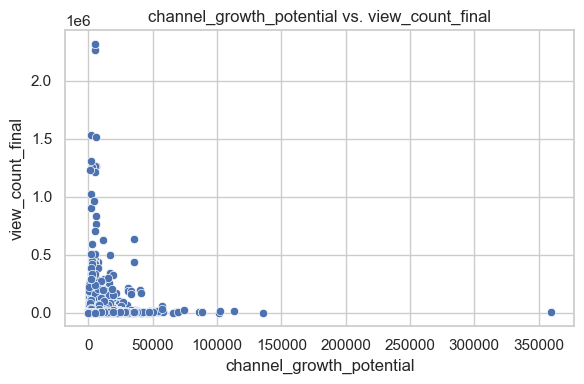

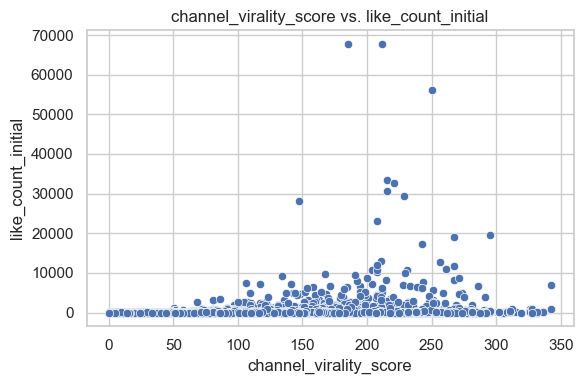

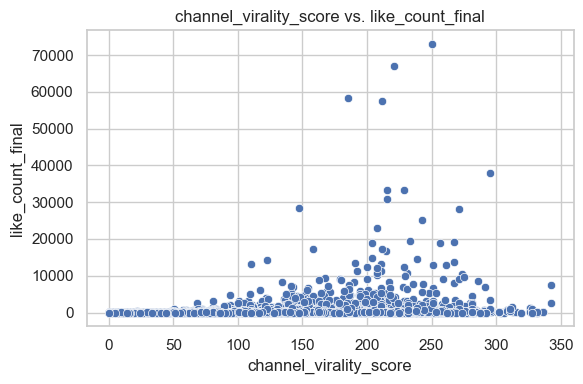

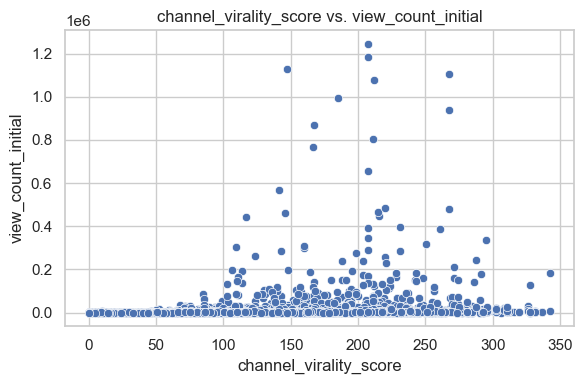

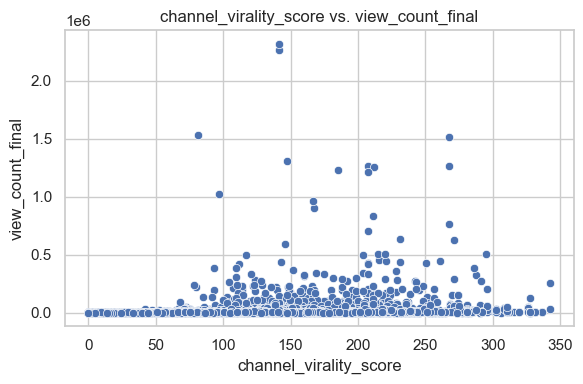

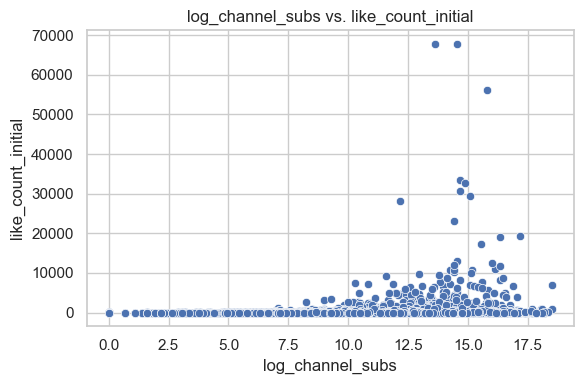

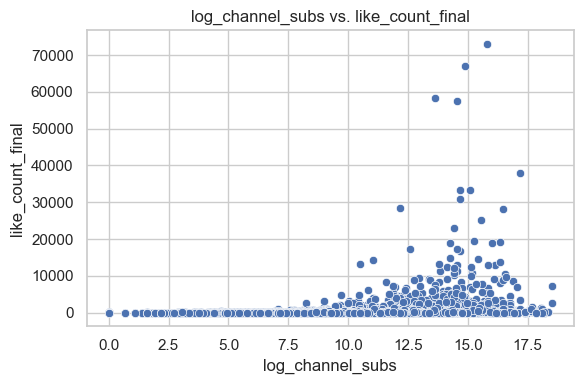

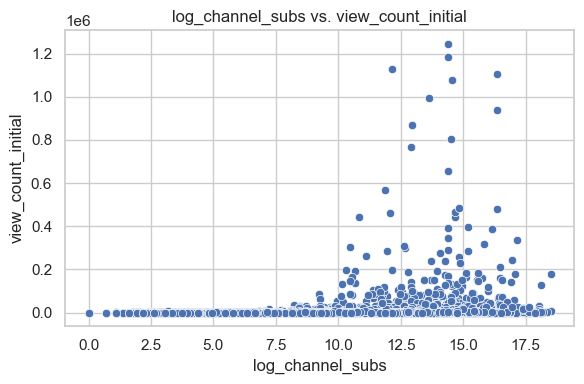

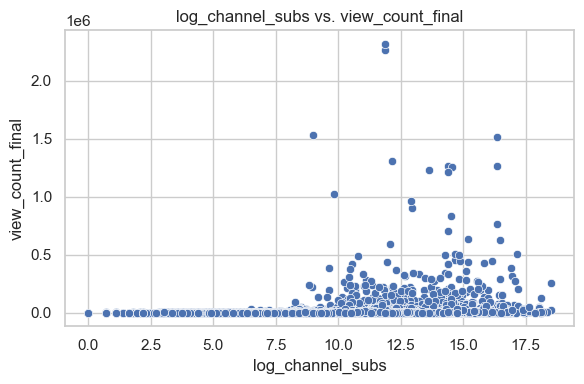

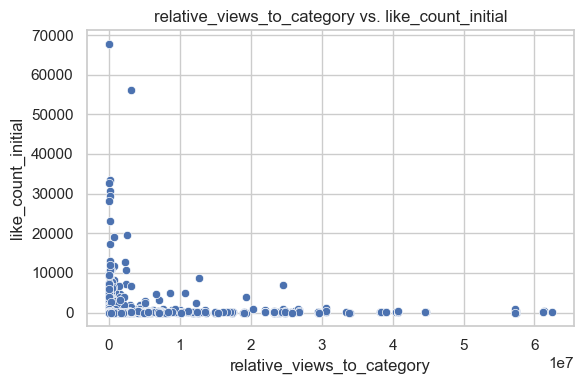

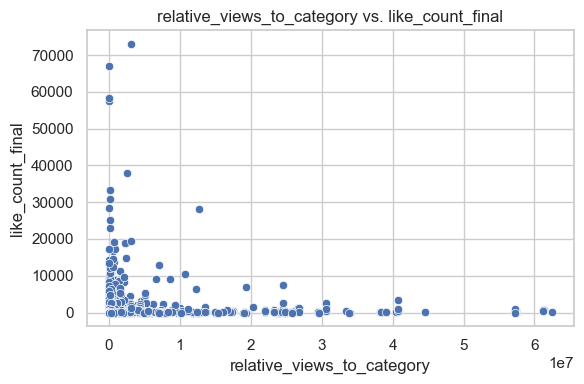

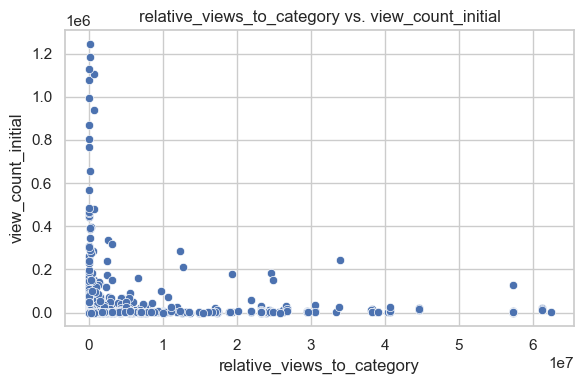

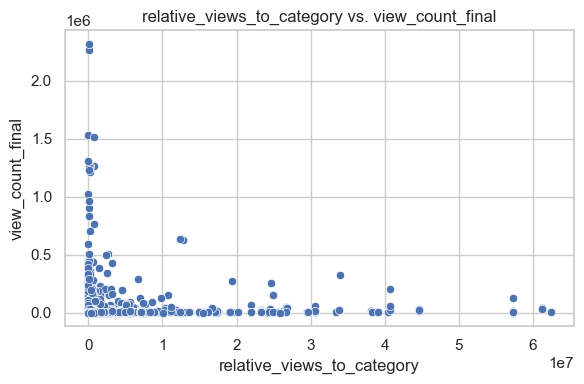

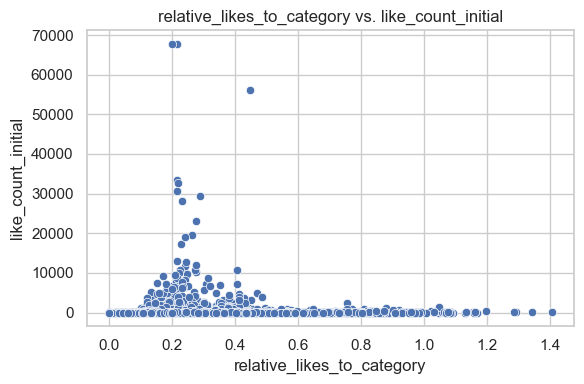

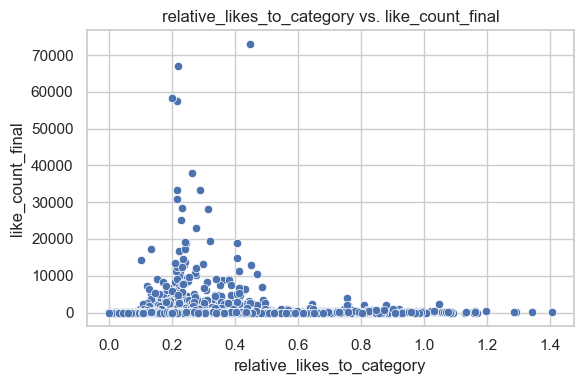

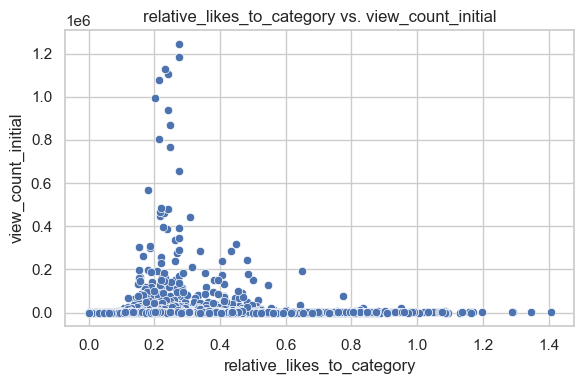

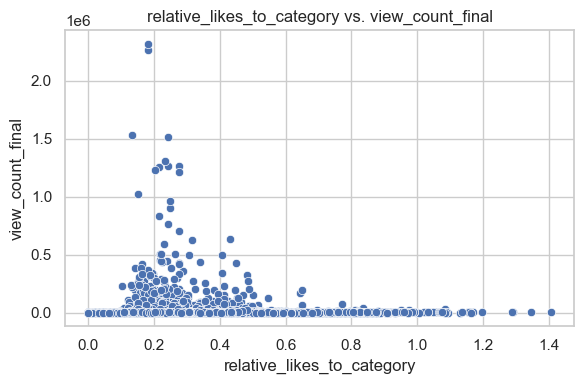

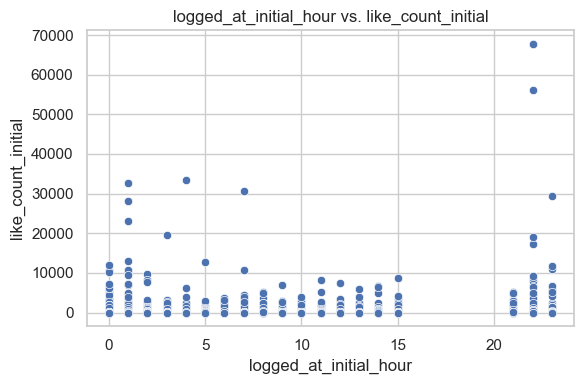

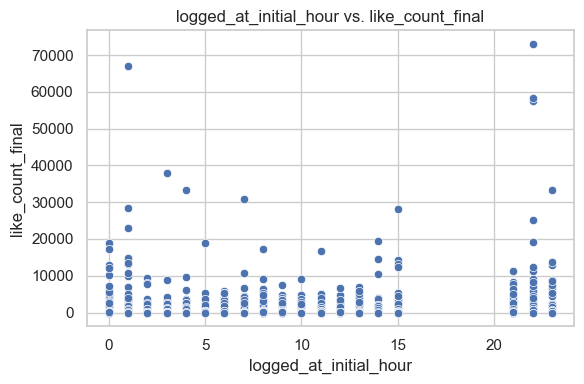

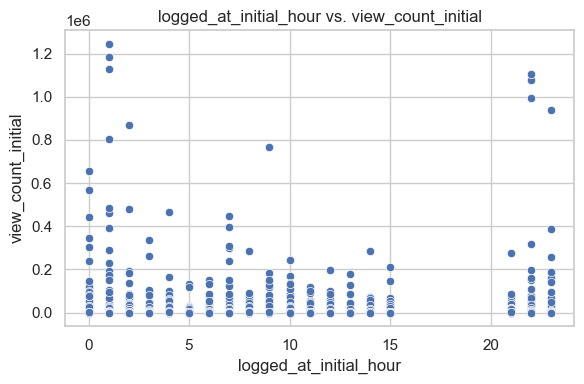

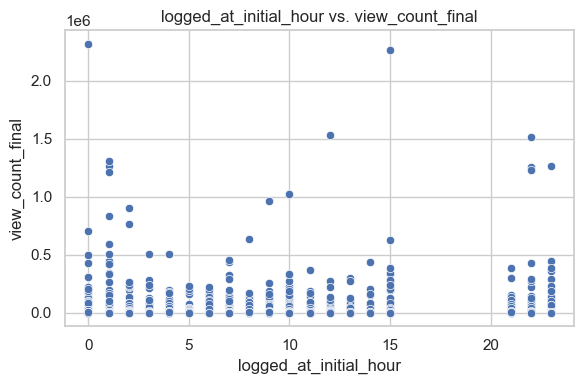

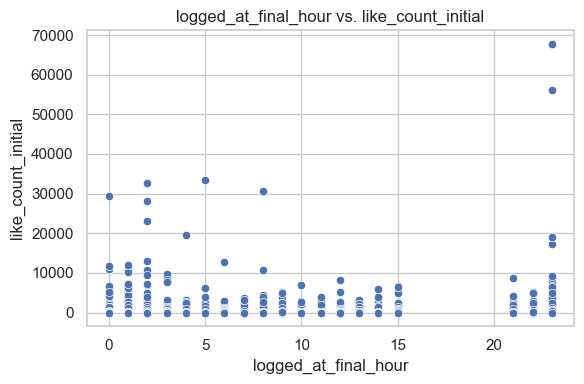

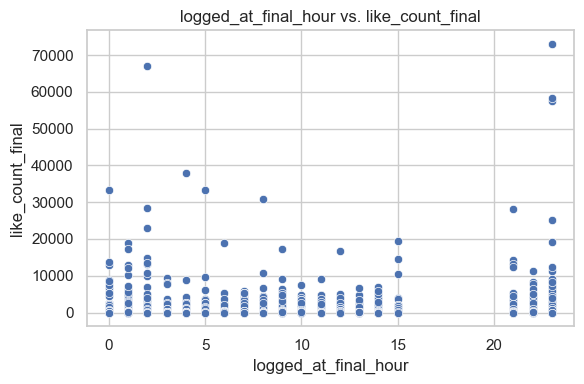

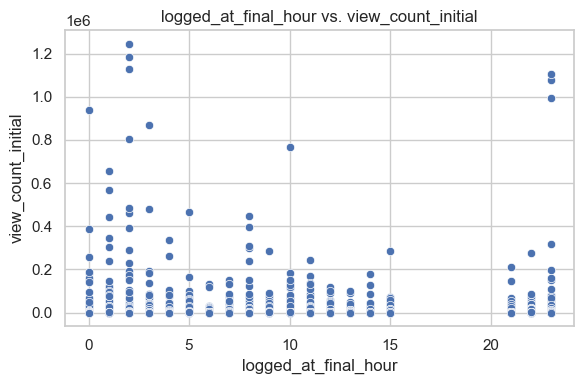

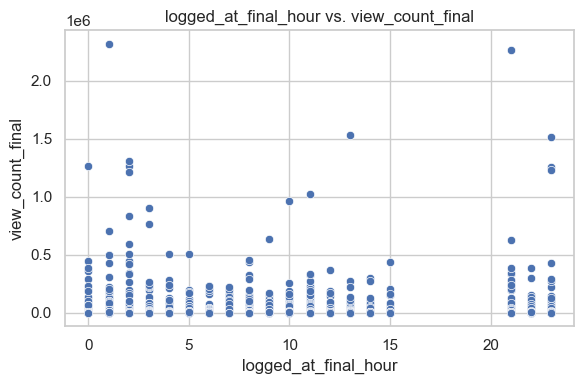

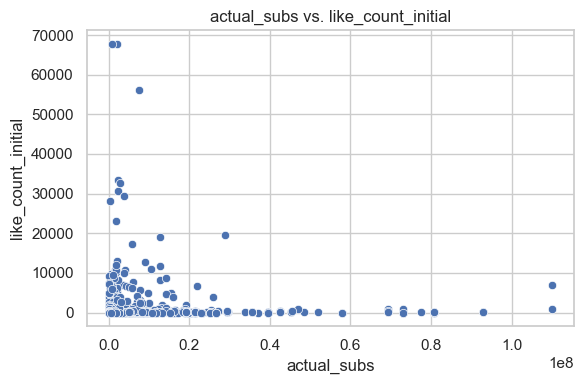

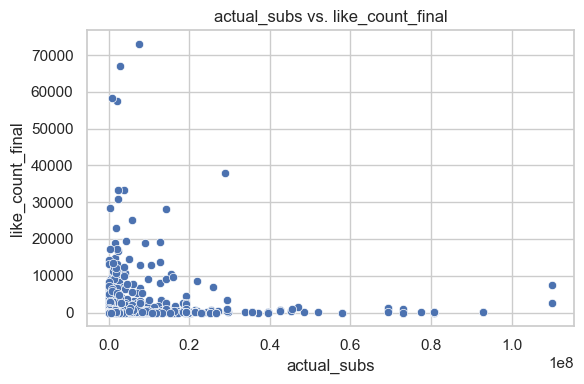

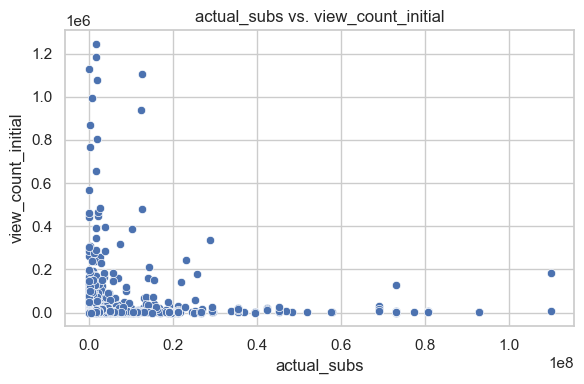

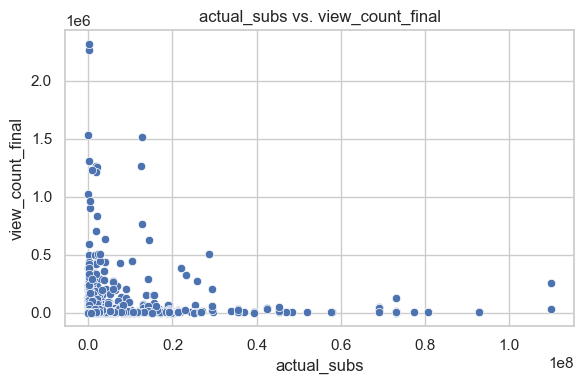

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_columns = [
    'like_count_initial',
    'like_count_final',
    'view_count_initial',
    'view_count_final'
]

for feature in df.columns:
    if feature not in target_columns and pd.api.types.is_numeric_dtype(df[feature]):
        for target in target_columns:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[feature], y=df[target])
            plt.title(f'{feature} vs. {target}')
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.tight_layout()
            plt.grid(True)
            plt.show()